# Forecasting & Simulation Notebook

This notebook demonstrates a time series modeling and simulation pipeline built for demand forecasting. It integrates data preprocessing, statistical modeling, and visualization components, while ensuring modularity for adaptation to similar forecasting use cases.

## Setup & Libraries

The notebook uses Python libraries such as pandas, numpy, matplotlib, seaborn, scikit-learn, and statsmodels for data manipulation, modeling, and visualization.

## Data Preprocessing

Raw datasets are loaded, cleaned, and merged to prepare time series input data. Time-based grouping and feature engineering are performed.

## Modeling & Forecasting

Statistical models such as ARIMA, Exponential Smoothing, or regression-based methods are applied for time series forecasting. Results are evaluated and visualized.

## Scenario Simulation

Multiple forecasting scenarios are simulated to test sensitivity to assumptions or to project future outcomes under uncertainty.

## Observations & Next Steps

- The notebook provides a foundation for time series demand forecasting with simulation support.
- Additional models or error metrics may be integrated.
- Organizational details have been omitted for privacy.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
import shap
import pandas as pd
from ortools.linear_solver import pywraplp

from crm_job import get_from_csv, lag_data_frame, drop_zero_colRows, feature_summary_stats, add_rep_feature,\
engagement_metrics, drop_lag0_cols,drop_cols, outlier_treatment,engagement_data,cardio_f2f_KPI,custom_div



In [2]:
df = get_from_csv('/Users/parameshwaraniyer/Downloads/data.csv')

## Data Extraction & Transformation 

In [3]:
dynamic_feature_list = ['conference_total','email_open_total','f2f_total','prescription_total','webinar_total']
target_variable = ['prescription_total']
max_time_line = 12
window = 4

lead_df,lead_df_result = lag_data_frame(df,dynamic_feature_list, max_time_line, window)

In [4]:
display(lead_df)
display(lead_df_result)

,lead_0,lead_1,lead_2,lead_3
0,01,02,03,04
1,02,03,04,05
2,03,04,05,06
3,04,05,06,07
4,05,06,07,08
5,06,07,08,09
6,07,08,09,10
7,08,09,10,11
8,09,10,11,12


,id,customer_id,rep_id,office_or_hospital_based,gender,is_cardiologist,is_gp,years_since_graduation,conference_total_lead_0,email_open_total_lead_0,...,conference_total_lead_2,email_open_total_lead_2,f2f_total_lead_2,prescription_total_lead_2,webinar_total_lead_2,conference_total_lead_3,email_open_total_lead_3,f2f_total_lead_3,prescription_total_lead_3,webinar_total_lead_3
0,0,100,100,Office,False,False,True,23.0,0,0,...,0,1,4,0,0,1,0,8,0,0
1,1,101,101,Office,True,False,True,27.0,0,1,...,0,0,0,0,0,0,4,1,0,0
2,2,102,101,Hospital,True,False,True,29.0,0,0,...,0,0,1,23,0,0,0,0,0,0
3,3,103,102,Hospital,False,False,True,22.0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,4,104,103,Office,True,False,True,27.0,1,0,...,0,0,3,0,0,0,3,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75136,8344,8444,160,Hospital,False,True,False,11.0,0,2,...,0,0,7,0,0,0,0,0,5,0
75137,8345,8445,123,Office,False,False,True,4.0,0,0,...,0,0,1,0,0,0,0,0,0,0
75138,8346,8446,116,Office,False,False,True,16.0,1,0,...,0,3,2,0,0,0,2,0,1,0
75139,8347,8447,152,Office,False,False,True,27.0,0,1,...,0,1,0,0,0,0,2,0,1,0


## Learning Domain

In [5]:
feature_summary_stats(lead_df_result, dynamic_feature_list)

,current_month,conference_total_Count
0,01,870
1,02,814
2,03,814
3,04,863
4,05,835
5,06,865
6,07,796
7,08,828
8,09,824


,current_month,email_open_total_Count
0,01,8322
1,02,8116
2,03,8231
3,04,8479
4,05,8345
5,06,8535
6,07,8250
7,08,8290
8,09,8248


,current_month,f2f_total_Count
0,01,16182
1,02,15301
2,03,18121
3,04,18905
4,05,19247
5,06,18542
6,07,17470
7,08,15838
8,09,16058


,current_month,prescription_total_Count
0,01,0
1,02,0
2,03,9516
3,04,0
4,05,0
5,06,9371
6,07,0
7,08,0
8,09,8826


,current_month,webinar_total_Count
0,01,537
1,02,716
2,03,958
3,04,1175
4,05,1240
5,06,1104
6,07,844
7,08,509
8,09,421


In [6]:
lead_df_result_clean = lead_df_result[(lead_df_result['current_month'] == '03') | (lead_df_result['current_month'] == '06') | (lead_df_result['current_month'] == '09')]

In [7]:
lead_df_result_clean.shape

(25047, 29)

In [8]:
feature_summary_stats(lead_df_result_clean, dynamic_feature_list)

,current_month,conference_total_Count
0,03,814
1,06,865
2,09,824


,current_month,email_open_total_Count
0,03,8231
1,06,8535
2,09,8248


,current_month,f2f_total_Count
0,03,18121
1,06,18542
2,09,16058


,current_month,prescription_total_Count
0,03,9516
1,06,9371
2,09,8826


,current_month,webinar_total_Count
0,03,958
1,06,1104
2,09,421


In [9]:
#Removing null interaction rows
lead_df_result_clean = drop_zero_colRows(lead_df_result_clean, dynamic_feature_list)
lead_df_result_clean.shape

(25023, 29)

In [10]:
25023/25047

0.9990418014133429

In [11]:
feature_summary_stats(lead_df_result_clean, dynamic_feature_list)

,current_month,conference_total_Count
0,03,814
1,06,865
2,09,824


,current_month,email_open_total_Count
0,03,8231
1,06,8535
2,09,8248


,current_month,f2f_total_Count
0,03,18121
1,06,18542
2,09,16058


,current_month,prescription_total_Count
0,03,9516
1,06,9371
2,09,8826


,current_month,webinar_total_Count
0,03,958
1,06,1104
2,09,421


## Missing Values

In [12]:
display(lead_df_result_clean.isnull().sum())
lead_df_result_clean = lead_df_result_clean.dropna()
display(lead_df_result_clean.isnull().sum())
display(lead_df_result_clean.shape)

id                            0
customer_id                   0
rep_id                        0
office_or_hospital_based     15
gender                        0
is_cardiologist               0
is_gp                         0
years_since_graduation        3
conference_total_lead_0       0
email_open_total_lead_0       0
f2f_total_lead_0              0
prescription_total_lead_0     0
webinar_total_lead_0          0
current_month                 0
conference_total_lead_1       0
email_open_total_lead_1       0
f2f_total_lead_1              0
prescription_total_lead_1     0
webinar_total_lead_1          0
conference_total_lead_2       0
email_open_total_lead_2       0
f2f_total_lead_2              0
prescription_total_lead_2     0
webinar_total_lead_2          0
conference_total_lead_3       0
email_open_total_lead_3       0
f2f_total_lead_3              0
prescription_total_lead_3     0
webinar_total_lead_3          0
dtype: int64

id                           0
customer_id                  0
rep_id                       0
office_or_hospital_based     0
gender                       0
is_cardiologist              0
is_gp                        0
years_since_graduation       0
conference_total_lead_0      0
email_open_total_lead_0      0
f2f_total_lead_0             0
prescription_total_lead_0    0
webinar_total_lead_0         0
current_month                0
conference_total_lead_1      0
email_open_total_lead_1      0
f2f_total_lead_1             0
prescription_total_lead_1    0
webinar_total_lead_1         0
conference_total_lead_2      0
email_open_total_lead_2      0
f2f_total_lead_2             0
prescription_total_lead_2    0
webinar_total_lead_2         0
conference_total_lead_3      0
email_open_total_lead_3      0
f2f_total_lead_3             0
prescription_total_lead_3    0
webinar_total_lead_3         0
dtype: int64

(25005, 29)

In [13]:
25005/25023

0.9992806617911522

In [14]:
#dropping lag cols of interactions as they are captured at the same time as lag0 prescription 
# dropping lag1 & lag2 of prescription as they contain no info
lead_df_result_clean = drop_lag0_cols(lead_df_result_clean,dynamic_feature_list, target_variable )

cols_drop = ['prescription_total_lead_1','prescription_total_lead_2']
lead_df_result_clean = drop_cols(lead_df_result_clean,cols_drop)

lead_df_result_clean.describe()

,id,customer_id,rep_id,years_since_graduation,prescription_total_lead_0,conference_total_lead_1,email_open_total_lead_1,f2f_total_lead_1,webinar_total_lead_1,conference_total_lead_2,email_open_total_lead_2,f2f_total_lead_2,webinar_total_lead_2,conference_total_lead_3,email_open_total_lead_3,f2f_total_lead_3,prescription_total_lead_3,webinar_total_lead_3
count,25005.000000,25005.000000,25005.000000,25005.000000,25005.000000,25005.000000,25005.00000,25005.000000,25005.000000,25005.00000,25005.000000,25005.000000,25005.000000,25005.000000,25005.000000,25005.000000,25005.000000,25005.000000
mean,4173.050230,4273.050230,154.289502,27.089302,1.107818,0.099780,0.99756,2.142931,0.096101,0.10078,0.996361,2.105539,0.083583,0.101180,1.006319,1.383243,1.035353,0.060988
std,2410.065656,2410.065656,36.605548,12.368666,2.077518,0.315065,0.99396,2.217021,0.390152,0.31481,0.998653,2.216581,0.376231,0.315697,1.002656,2.016116,2.041059,0.328120
min,0.000000,100.000000,100.000000,3.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2085.000000,2185.000000,124.000000,17.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4173.000000,4273.000000,149.000000,28.000000,0.000000,0.000000,1.00000,2.000000,0.000000,0.00000,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,6261.000000,6361.000000,185.000000,37.000000,2.000000,0.000000,2.00000,3.000000,0.000000,0.00000,2.000000,3.000000,0.000000,0.000000,2.000000,2.000000,2.000000,0.000000
max,8348.000000,8448.000000,252.000000,68.000000,42.000000,3.000000,7.00000,21.000000,7.000000,2.00000,7.000000,22.000000,8.000000,3.000000,7.000000,19.000000,40.000000,9.000000


In [15]:
int_cols = ['id' , 'customer_id' , 'rep_id']
nrow,lead_df_result_clean = outlier_treatment(lead_df_result_clean, int_cols,0.01,0.99)
lead_df_result_clean.shape

(23327, 23)

In [16]:
23327/25005

0.9328934213157368

## Adding Feature on rep Exposure at customer level

In [17]:
#adding rep_id global feature
lead_df_result_clean = add_rep_feature(lead_df_result_clean)

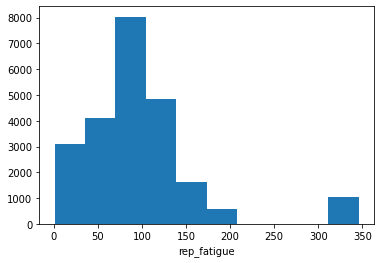

In [18]:
import matplotlib.pyplot as plt

x = lead_df_result_clean['count_customer_id']
plt.hist(x)
plt.xlabel("rep_fatigue")
plt.show()

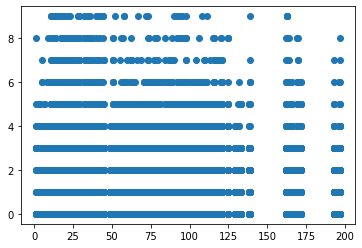

In [19]:
df_filter = lead_df_result_clean[lead_df_result_clean['count_customer_id'] <= 200]
x = df_filter['count_customer_id']
y = df_filter['prescription_total_lead_0']
#x = [x <= 200]
plt.scatter(x,y)
plt.show()

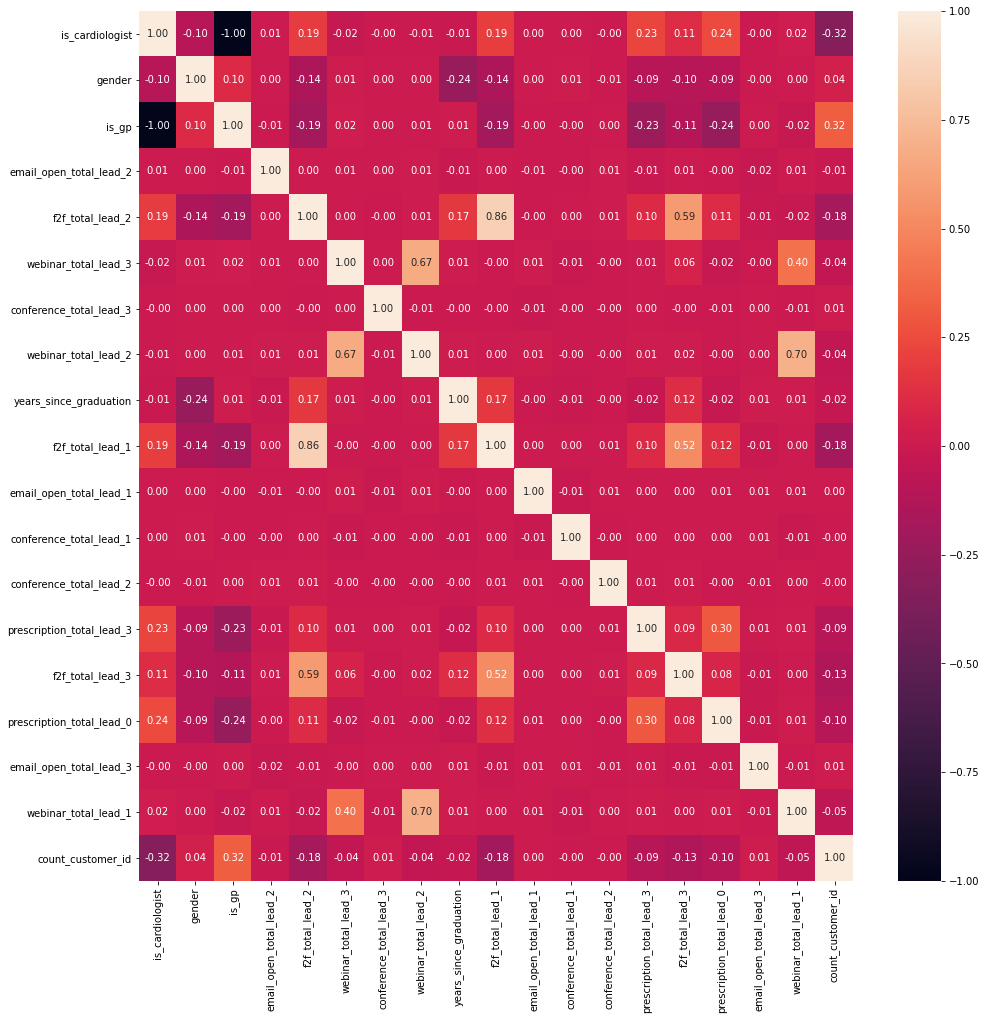

In [20]:

cols_drop = ['id', 'customer_id', 'rep_id','current_month']
corr_analysis_df = lead_df_result_clean
corr_analysis_df = corr_analysis_df.drop(cols_drop, axis = 1)
plt.figure(figsize=(16,16))
sns.heatmap(corr_analysis_df.corr(), annot=True, fmt=".2f")

plt.show()

In [21]:
cols_drop = ['is_gp','count_customer_id']
lead_df_result_clean = drop_cols(lead_df_result_clean, cols_drop)

## ML Model 

In [22]:
cols_drop = ['id','customer_id','rep_id', 'current_month']
lead_df_result_ml = lead_df_result_clean.drop(cols_drop, axis = 1)

display(lead_df_result_ml.isnull().sum())

is_cardiologist              0
office_or_hospital_based     0
gender                       0
email_open_total_lead_2      0
f2f_total_lead_2             0
webinar_total_lead_3         0
conference_total_lead_3      0
webinar_total_lead_2         0
years_since_graduation       0
f2f_total_lead_1             0
email_open_total_lead_1      0
conference_total_lead_1      0
conference_total_lead_2      0
prescription_total_lead_3    0
f2f_total_lead_3             0
prescription_total_lead_0    0
email_open_total_lead_3      0
webinar_total_lead_1         0
dtype: int64

In [23]:
X = lead_df_result_ml.drop(['prescription_total_lead_3'], axis=1)
y = lead_df_result_ml.prescription_total_lead_3

X_train, X_rest, Y_train, Y_rest = train_test_split(X,y, train_size=0.8, random_state=0)


X_validate, X_test, Y_validate, Y_test = train_test_split(X_rest,Y_rest, test_size=0.5, random_state=0)

categorical_features_indices = [0 ,1,2]

In [24]:
from catboost import CatBoostRegressor

model=CatBoostRegressor(iterations=50, depth=3, learning_rate=0.1, loss_function='RMSE')
model.fit(X_train, Y_train,cat_features=categorical_features_indices,eval_set=(X_validate, Y_validate),verbose=True,
          plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.4471020	test: 1.4663353	best: 1.4663353 (0)	total: 63.2ms	remaining: 3.1s
1:	learn: 1.4338787	test: 1.4548375	best: 1.4548375 (1)	total: 69.6ms	remaining: 1.67s
2:	learn: 1.4217503	test: 1.4442912	best: 1.4442912 (2)	total: 75.2ms	remaining: 1.18s
3:	learn: 1.4118386	test: 1.4357492	best: 1.4357492 (3)	total: 85.4ms	remaining: 982ms
4:	learn: 1.4037497	test: 1.4288455	best: 1.4288455 (4)	total: 87.8ms	remaining: 790ms
5:	learn: 1.3969707	test: 1.4227959	best: 1.4227959 (5)	total: 90.8ms	remaining: 666ms
6:	learn: 1.3915606	test: 1.4182803	best: 1.4182803 (6)	total: 95.4ms	remaining: 586ms
7:	learn: 1.3872078	test: 1.4145845	best: 1.4145845 (7)	total: 100ms	remaining: 526ms
8:	learn: 1.3839661	test: 1.4118461	best: 1.4118461 (8)	total: 103ms	remaining: 468ms
9:	learn: 1.3804510	test: 1.4088280	best: 1.4088280 (9)	total: 106ms	remaining: 422ms
10:	learn: 1.3776256	test: 1.4061230	best: 1.4061230 (10)	total: 108ms	remaining: 383ms
11:	learn: 1.3756165	test: 1.4048235	best: 1.4

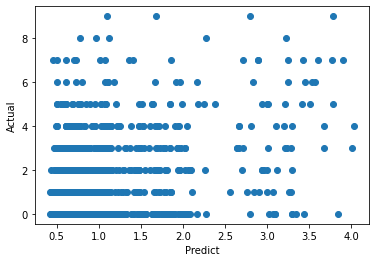

1.371083974211076

In [25]:
x = model.predict(X_test)
y = Y_test

plt.scatter(x,y)
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.show()

# Test-RMSE
test_rmse = np.array(x-y)
test_rmse = np.sqrt(sum(np.power(test_rmse,2))/len(test_rmse))
test_rmse

In [26]:
test_wmape = np.sum(np.abs(x-y))/np.sum(y)
test_wmape

1.1348780377226468

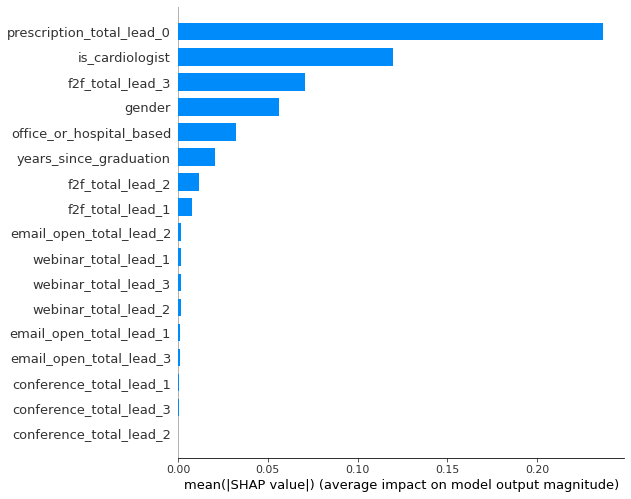

In [27]:
from catboost import Pool
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(Pool(X_train, Y_train, cat_features=categorical_features_indices))
shap.summary_plot(shap_values, X_train, plot_type="bar")

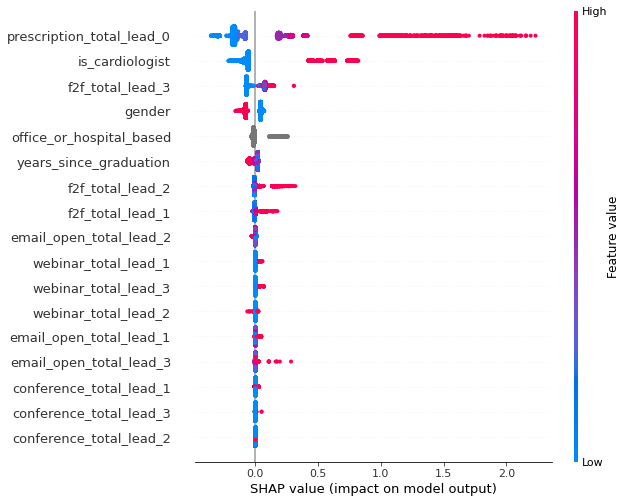

,0,1
0,is_cardiologist,-0.00522595
1,office_or_hospital_based,0.00041157
2,gender,2.18491e-05
3,email_open_total_lead_2,-6.88736e-06
4,f2f_total_lead_2,0.000618918
5,webinar_total_lead_3,-1.31822e-06
6,conference_total_lead_3,5.49343e-06
7,webinar_total_lead_2,-2.08199e-05
8,years_since_graduation,4.22512e-05
9,f2f_total_lead_1,-9.04034e-05


In [111]:
shap.summary_plot(shap_values, X_train)
x = [ i for i in np.mean(shap_values,0)]
y = [j for j in X_test.columns]
pd.DataFrame([y,x]).T

## KPIs & Engagement Metrics

In [29]:
lead_df_result_engagement = lead_df_result
lead_df_result_engagement

,id,customer_id,rep_id,office_or_hospital_based,gender,is_cardiologist,is_gp,years_since_graduation,conference_total_lead_0,email_open_total_lead_0,...,conference_total_lead_2,email_open_total_lead_2,f2f_total_lead_2,prescription_total_lead_2,webinar_total_lead_2,conference_total_lead_3,email_open_total_lead_3,f2f_total_lead_3,prescription_total_lead_3,webinar_total_lead_3
0,0,100,100,Office,False,False,True,23.0,0,0,...,0,1,4,0,0,1,0,8,0,0
1,1,101,101,Office,True,False,True,27.0,0,1,...,0,0,0,0,0,0,4,1,0,0
2,2,102,101,Hospital,True,False,True,29.0,0,0,...,0,0,1,23,0,0,0,0,0,0
3,3,103,102,Hospital,False,False,True,22.0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,4,104,103,Office,True,False,True,27.0,1,0,...,0,0,3,0,0,0,3,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75136,8344,8444,160,Hospital,False,True,False,11.0,0,2,...,0,0,7,0,0,0,0,0,5,0
75137,8345,8445,123,Office,False,False,True,4.0,0,0,...,0,0,1,0,0,0,0,0,0,0
75138,8346,8446,116,Office,False,False,True,16.0,1,0,...,0,3,2,0,0,0,2,0,1,0
75139,8347,8447,152,Office,False,False,True,27.0,0,1,...,0,1,0,0,0,0,2,0,1,0


In [28]:
# how does it work 
# Filter for customer_id == 100 & current_month == '03', single row!

df_filter = lead_df_result_engagement[(lead_df_result_engagement['customer_id'] == 100) & (lead_df_result_engagement['current_month'] == '03')]
display(df_filter)
engagement_metrics(df_filter, debug = True)

,id,customer_id,rep_id,office_or_hospital_based,gender,is_cardiologist,is_gp,years_since_graduation,conference_total_lead_0,email_open_total_lead_0,...,conference_total_lead_2,email_open_total_lead_2,f2f_total_lead_2,prescription_total_lead_2,webinar_total_lead_2,conference_total_lead_3,email_open_total_lead_3,f2f_total_lead_3,prescription_total_lead_3,webinar_total_lead_3
16698,0,100,100,Office,False,False,True,23.0,0,1,...,0,3,8,0,0,0,0,6,3,2


(33,
 25,
 4,
            channels  interactions
 0  conference_total             1
 1  email_open_total             4
 2         f2f_total            26
 3     webinar_total             2)

In [29]:
result_engagement = engagement_data(lead_df_result_engagement,dynamic_feature_list)
result_engagement

,years_since_graduation,office_or_hospital_based,id,current_month,is_gp,customer_id,is_cardiologist,gender,rep_id,conference,email,f2f,prescription,webinar
0,23.0,Office,0,01,True,100,False,False,100,1,1,18,0,0
1,27.0,Office,1,01,True,101,False,True,101,0,6,2,0,0
2,29.0,Hospital,2,01,True,102,False,True,101,0,0,4,23,0
3,22.0,Hospital,3,01,True,103,False,False,102,0,0,0,1,0
4,27.0,Office,4,01,True,104,False,True,103,1,4,11,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75136,11.0,Hospital,8344,09,False,8444,True,False,160,1,2,16,10,0
75137,4.0,Office,8345,09,True,8445,False,False,123,0,1,3,1,0
75138,16.0,Office,8346,09,True,8446,False,False,116,1,5,5,3,0
75139,27.0,Office,8347,09,True,8447,False,False,152,0,5,1,9,0


### Measures for total_engagement, consistency & Num of sources

In [30]:
tot_engagement_measure = result_engagement.groupby(['customer_id','current_month'])\
.apply(lambda row : row.conference + row.email + row.f2f + row.webinar)\
.reset_index(drop = True, level = 2)

tot_engagement_measure = tot_engagement_measure.reset_index()
tot_engagement_measure.columns = ['customer_id', 'current_month', 'tot_engagement_measure']
tot_engagement_measure

,customer_id,current_month,tot_engagement_measure
0,100,01,20
1,100,02,27
2,100,03,33
3,100,04,35
4,100,05,36
...,...,...,...
75136,8448,05,4
75137,8448,06,5
75138,8448,07,5
75139,8448,08,10


In [31]:
consistency_measure = result_engagement.groupby(['customer_id','current_month'])\
.apply(lambda row : np.std([row.conference, row.email, row.f2f,row.webinar]))\
.reset_index()
consistency_measure.columns = ['customer_id', 'current_month', 'consistency_measure']
consistency_measure

,customer_id,current_month,consistency_measure
0,100,01,7.516648
1,100,02,8.926786
2,100,03,10.304732
3,100,04,10.034316
4,100,05,9.565563
...,...,...,...
75136,8448,05,1.732051
75137,8448,06,1.639360
75138,8448,07,1.639360
75139,8448,08,3.278719


In [32]:
num_sources_measure = result_engagement.groupby(['customer_id','current_month'])\
.apply(lambda row : sum(i > 0 for i in [row.conference, row.email, row.f2f,row.webinar]))\
.reset_index(drop = True, level = 2)
num_sources_measure = num_sources_measure.reset_index()
num_sources_measure.columns = ['customer_id', 'current_month', 'num_sources_measure']
num_sources_measure

,customer_id,current_month,num_sources_measure
0,100,01,3
1,100,02,3
2,100,03,4
3,100,04,4
4,100,05,3
...,...,...,...
75136,8448,05,1
75137,8448,06,2
75138,8448,07,2
75139,8448,08,2


### KPI based out of ML model

In [33]:
result_cardio_f2f_KPI =  cardio_f2f_KPI(result_engagement)
result_cardio_f2f_KPI

,rep_id,current_month,is_gp_f2f,is_cardiologist_f2f,cardio_f2f_KPI,total_f2f
0,100,01,844.0,0.0,0.0,844.0
1,100,02,904.0,0.0,0.0,904.0
2,100,03,975.0,0.0,0.0,975.0
3,100,04,1015.0,0.0,0.0,1015.0
4,100,05,1030.0,0.0,0.0,1030.0
...,...,...,...,...,...,...
1372,252,05,0.0,5.0,1.0,5.0
1373,252,06,0.0,5.0,1.0,5.0
1374,252,07,0.0,7.0,1.0,7.0
1375,252,08,0.0,9.0,1.0,9.0


In [34]:
result_cardio_f2f_KPI.groupby('current_month').agg({'cardio_f2f_KPI':'mean','total_f2f' :'sum' })

,cardio_f2f_KPI,total_f2f
current_month,,
01,0.264540,68509.0
02,0.271622,71574.0
03,0.271915,74815.0
04,0.271977,74164.0
05,0.272137,71097.0
06,0.265494,67908.0
07,0.272379,66589.0
08,0.272649,66695.0
09,0.273327,50857.0


In [35]:
cardio_f2f_KPI_rep = result_cardio_f2f_KPI.groupby('rep_id').agg({'cardio_f2f_KPI':'mean','total_f2f' :'sum' })
display(cardio_f2f_KPI_rep.sort_values('cardio_f2f_KPI',ascending  = False))

,cardio_f2f_KPI,total_f2f
rep_id,,
252,1.0,50.0
165,1.0,1503.0
135,1.0,7116.0
136,1.0,690.0
228,1.0,593.0
...,...,...
152,0.0,1244.0
151,0.0,12348.0
149,0.0,3572.0


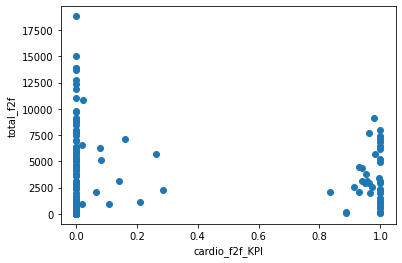

In [36]:
x = cardio_f2f_KPI_rep['cardio_f2f_KPI']
y = cardio_f2f_KPI_rep['total_f2f']

plt.scatter(x,y)

plt.xlabel('cardio_f2f_KPI')
plt.ylabel('total_f2f')
plt.show()

## Optimization

In [36]:
df_filter = lead_df_result_engagement[(lead_df_result_engagement['current_month'] == '09') ]
num_customers = df_filter['customer_id'].nunique()
num_reps = df_filter['rep_id'].nunique()

In [37]:
df_filter.groupby('rep_id')['customer_id'].nunique().sort_values(ascending = False).quantile(.97)

155.75999999999993

In [38]:
df_filter = df_filter[['customer_id','rep_id','prescription_total_lead_0']]

In [39]:
df_filter = df_filter.pivot_table('prescription_total_lead_0', 'customer_id','rep_id',fill_value = 0)

In [40]:
reward = df_filter.to_numpy()

In [41]:
reward.shape

(8349, 153)

In [42]:
#declaring variables
x = {}

solver = pywraplp.Solver('SolveAssignmentProblemMIP',pywraplp.Solver.CBC_MIXED_INTEGER_PROGRAMMING)

for i in range(num_customers):
    for j in range(num_reps):
        x[i, j] = solver.BoolVar('x[%i,%i]' % (i, j))

In [43]:
#Objective - assuming equal costs
solver.Maximize(solver.Sum([reward[i,j]*x[i,j] for i in range(num_customers) for j in range(num_reps)]))

In [44]:
#adding Constraints

#Max assignment of 1 rep per customer
for i in range(num_customers):
    solver.Add(solver.Sum([x[i, j] for j in range(num_reps)]) == 1)

    
#Max assignment of 150 customers per rep 
for i in range(num_reps):
    solver.Add(solver.Sum([x[j, i] for j in range(num_customers)]) <= 150)

In [45]:
# Solution
sol = solver.Solve()

In [46]:
#Finding max assignment for reps in solution
rep = {}
for i in range(num_reps):
    total_assignment = 0
    for j in range(num_customers):
        total_assignment = total_assignment + x[j, i].solution_value()
        
    rep[i] = total_assignment

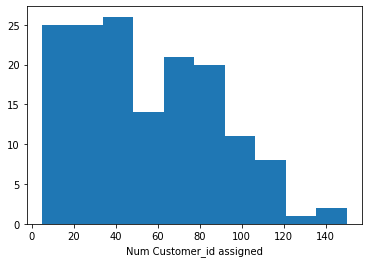

32.300218479174156

In [90]:
x1 = [rep[i] for i in rep]
plt.hist(x1)
plt.xlabel('Num Customer_id assigned')
plt.show()
np.std(x1)

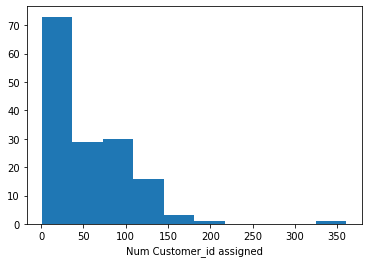

50.695910640133974

In [91]:
df_filter = lead_df_result_engagement[(lead_df_result_engagement['current_month'] == '09') ]
df_filter = df_filter[['customer_id','rep_id','prescription_total_lead_0']]
df_filter['assignments'] = df_filter.groupby(['rep_id'])['customer_id'].transform('nunique')
df_filter = df_filter[['rep_id','assignments']].drop_duplicates()
x2 = df_filter['assignments']
plt.hist(x2)
plt.xlabel('Num Customer_id assigned')
plt.show()
np.std(x2)

In [51]:
solver.Objective().Value()

8826.0

In [52]:
df_filter = lead_df_result_engagement[(lead_df_result_engagement['current_month'] == '09') ]
df_filter = df_filter[['customer_id','rep_id','prescription_total_lead_3']]
df_filter['prescription_total_lead_3'].sum()

7701

In [53]:
(8826.0- 7701)/7701

0.1460849240358395

In [92]:
(50.695910640133974 - 32.300218479174156)/50.695910640133974

0.3628634327439552

In [116]:
np.quantile(x1,0.75)

80.0